[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-06-10  0.184096  0.218703  0.160979  0.131890   0.113093 -0.214810
2019-06-11  0.505834  0.580688  0.470219  0.410332   0.392775 -0.797381
2019-06-12  0.266270  0.307259  0.321202  0.322793   0.304848 -0.248427
2019-06-13  0.388732  0.373625  0.539445  0.647480   0.630973 -0.690162
2019-06-14  0.732814  0.801402  0.802259  0.777421   0.761492 -2.152809
...              ...       ...       ...       ...        ...       ...
2024-05-08  0.682140  0.613705  0.747469  0.693426   0.677126 -0.863313
2024-05-09  0.592978  0.548555  0.552412  0.527289   0.510251 -0.405635
2024-05-10  0.571394  0.603404  0.591627  0.574812   0.557984 -1.503265
2024-05-13  0.955428  0.761076  0.851066  0.676276   0.659900 -1.123575
2024-05-14  0.543292  0.461322  0.513830  0.502436   0.485287 -1.522973

[745 rows x 6 columns]
                Open      High       Low

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


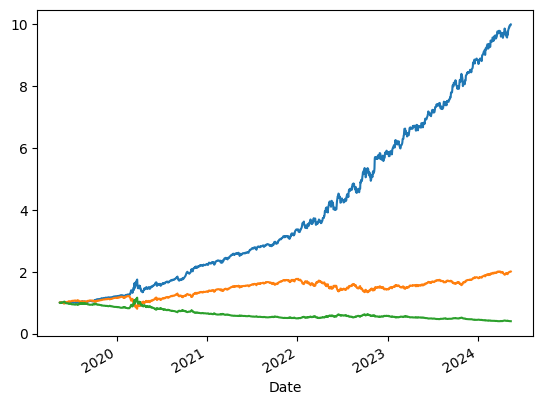

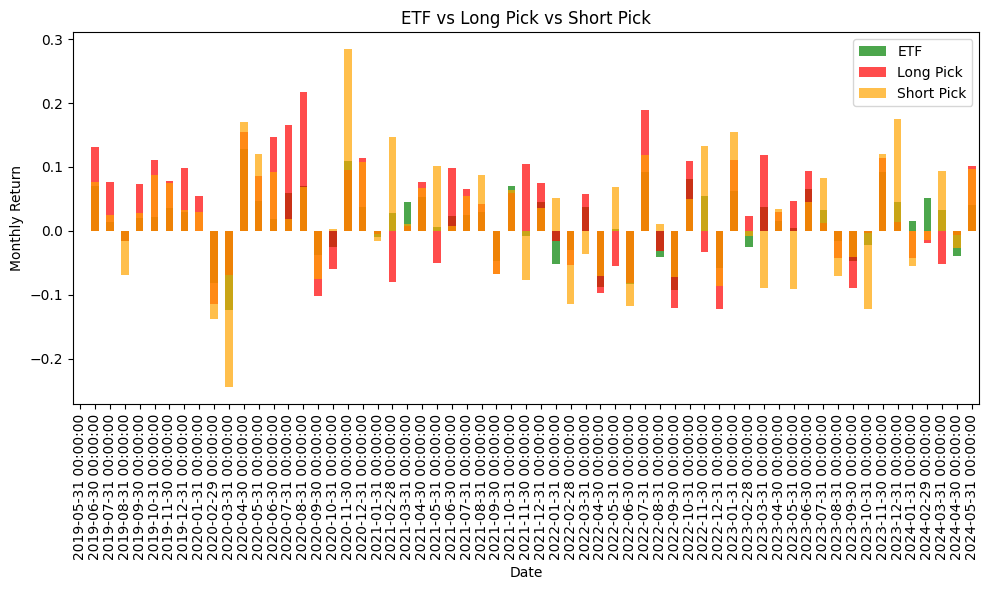

[*********************100%%**********************]  7 of 7 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No data found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


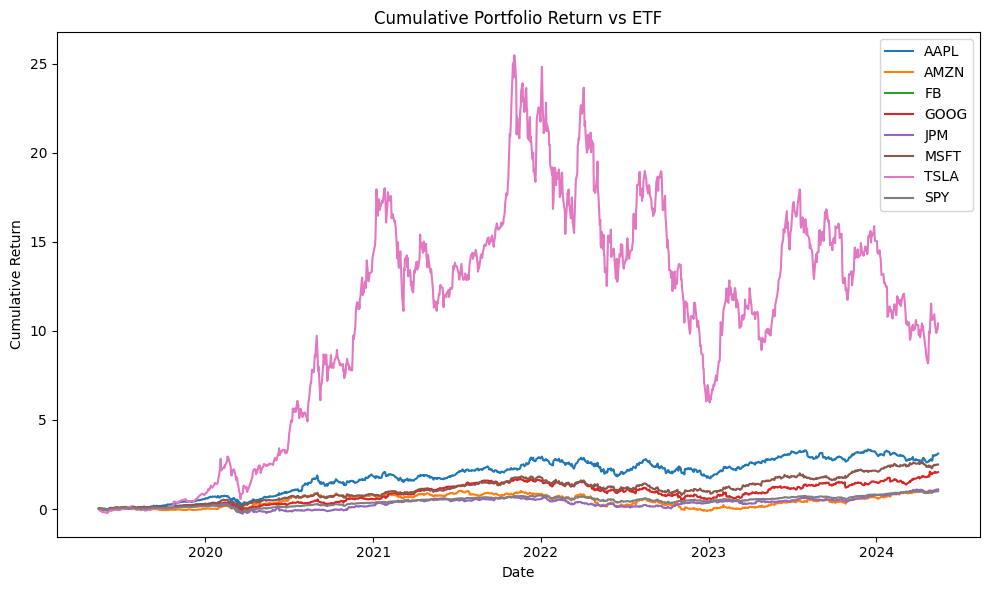

In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
pd.options
import random

# Download data for the VOO ETF over a period of 5 years
spy = yf.download(['VOO'], period = '5y')

# Calculate daily price returns
price_returns = spy.pct_change()
price_returns

# Define the window for calculating price momentum
window = 12
price_momentum = price_returns.rolling(window).sum()
price_momentum

# Calculate mean and standard deviation for z-score calculation
mean_factor = price_momentum.mean()
std_factor = price_momentum.std()
mean_factor

# Compute z-scores for the price momentum
z_score = (price_momentum - mean_factor) / std_factor
z_score

z_score['Adj Close'].mean()

# Define baskets based on z-score; long basket for positive, short for negative
long_basket = z_score[z_score['Adj Close'] >= z_score['Adj Close'].mean()]
print(long_basket)

long_basket['Adj Close']

short_basket = z_score[z_score['Adj Close'] < z_score['Adj Close'].mean()]
print(short_basket)

short_basket['Adj Close']

# Define a simple moving average strategy
def my_strategy(data):
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1
    return data
data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
data_with_strategy = my_strategy(data.copy())
returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']
cumulative_returns = (1 + strategy_returns).cumprod()
cumulative_returns.plot()

cumulative_returns.head()

def my_strategy(data):
    data['position'] = 1
    return data
data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
data_with_strategy = my_strategy(data.copy())
returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']
cumulative_returns = (1 + strategy_returns).cumprod()
cumulative_returns.plot()

def my_strategy(data):
    data['position'] = -1
    return data
data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
data_with_strategy = my_strategy(data.copy())
returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']

cumulative_returns = (1 + strategy_returns).cumprod()
cumulative_returns.plot()

def my_strategy(data):
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1
    return data
etf_data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
long_picks_data = yf.download('AAPL', period='5y')['Adj Close'].to_frame()
short_picks_data = yf.download('MS', period='5y')['Adj Close'].to_frame()
etf_data_with_strategy = my_strategy(etf_data.copy())
long_picks_data_with_strategy = my_strategy(long_picks_data.copy())
short_picks_data_with_strategy = my_strategy(short_picks_data.copy())
etf_monthly_returns = etf_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
long_picks_monthly_returns = long_picks_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
short_picks_monthly_returns = short_picks_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
fig, ax = plt.subplots(figsize=(10, 6))
etf_monthly_returns.plot(kind='bar', ax=ax, color='green', alpha=0.7)
long_picks_monthly_returns.plot(kind='bar', ax=ax, color='red', alpha=0.7)
short_picks_monthly_returns.plot(kind='bar', ax=ax, color='orange', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Return')
ax.set_title('ETF vs Long Pick vs Short Pick')
ax.legend(['ETF', 'Long Pick', 'Short Pick'])
plt.tight_layout()
plt.show()

portfolio_data = yf.download(['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB', 'TSLA', 'JPM'], period='5y')['Adj Close']
etf_data = yf.download('SPY', period='5y')['Adj Close']

portfolio_cumulative_returns = (portfolio_data.pct_change() + 1).cumprod() - 1
etf_cumulative_returns = (etf_data.pct_change() + 1).cumprod() - 1

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label= portfolio_data[0:7])
ax.plot(etf_cumulative_returns.index, etf_cumulative_returns, label='SPY')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title('Cumulative Portfolio Return vs ETF')
ax.legend()
plt.tight_layout()










